Valores nulos por columna:
Transaction_ID             0
Fecha_Compra               0
Producto                   0
Categoría                  0
Precio_Unitario            0
Cantidad_Vendida           0
Total_Venta                0
Método_Pago                0
Ciudad_Cliente             0
País_Cliente               0
Descuento_Aplicado         0
Costo_Envio                0
Tiempo_Entrega_Estimado    0
Tiempo_Entrega_Real        0
Satisfacción_Cliente       0
Tipo_Cliente               0
Valoración_Producto        0
Frecuencia_Compra          0
Rentabilidad               0
dtype: int64


C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_14824\2725476990.py:45: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Descuento_Aplicado', y='Rentabilidad', size='Cantidad_Vendida', hue='Cantidad_Vendida', alpha=0.7, data=df, palette=color_palette, edgecolor='black')


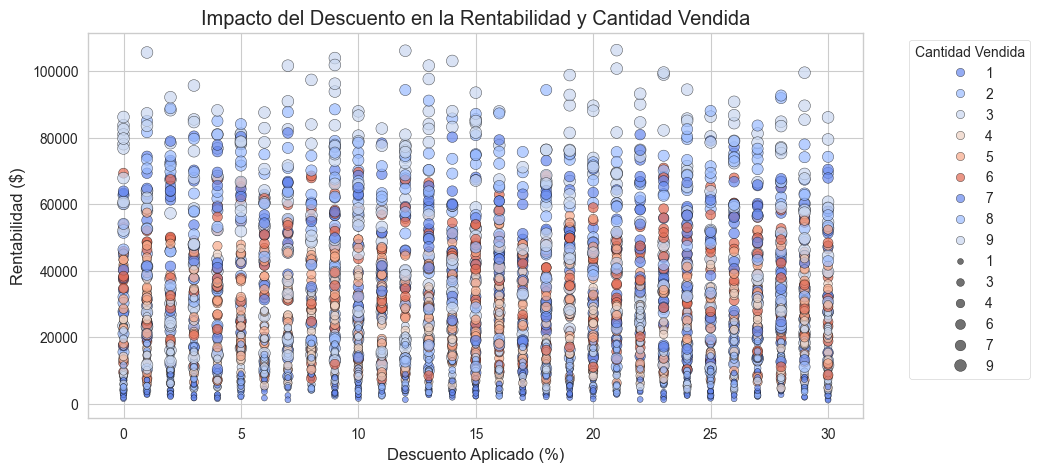

C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_14824\2725476990.py:54: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.histplot(data=df, x='Tiempo_Entrega_Real', hue='Satisfacción_Cliente', bins=15, kde=True, palette=color_palette, alpha=0.6)
C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_14824\2725476990.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Satisfacción del Cliente')


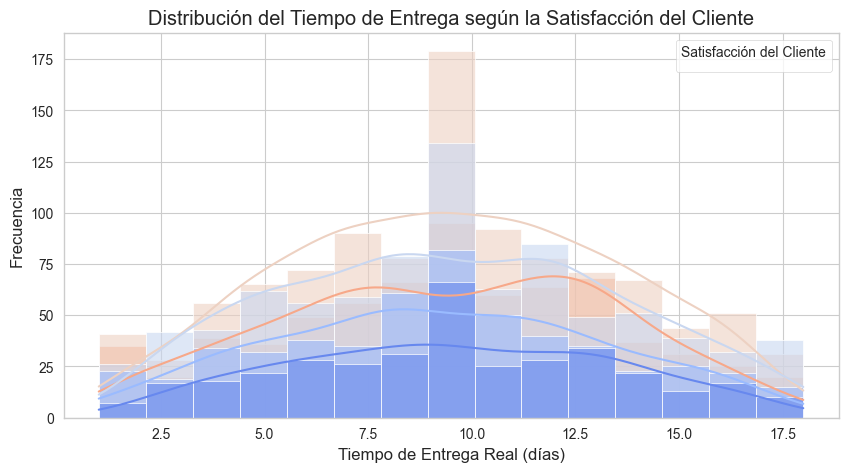

C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_14824\2725476990.py:63: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(x='Método_Pago', y='Total_Venta', hue='Frecuencia_Compra', data=df, palette=color_palette)


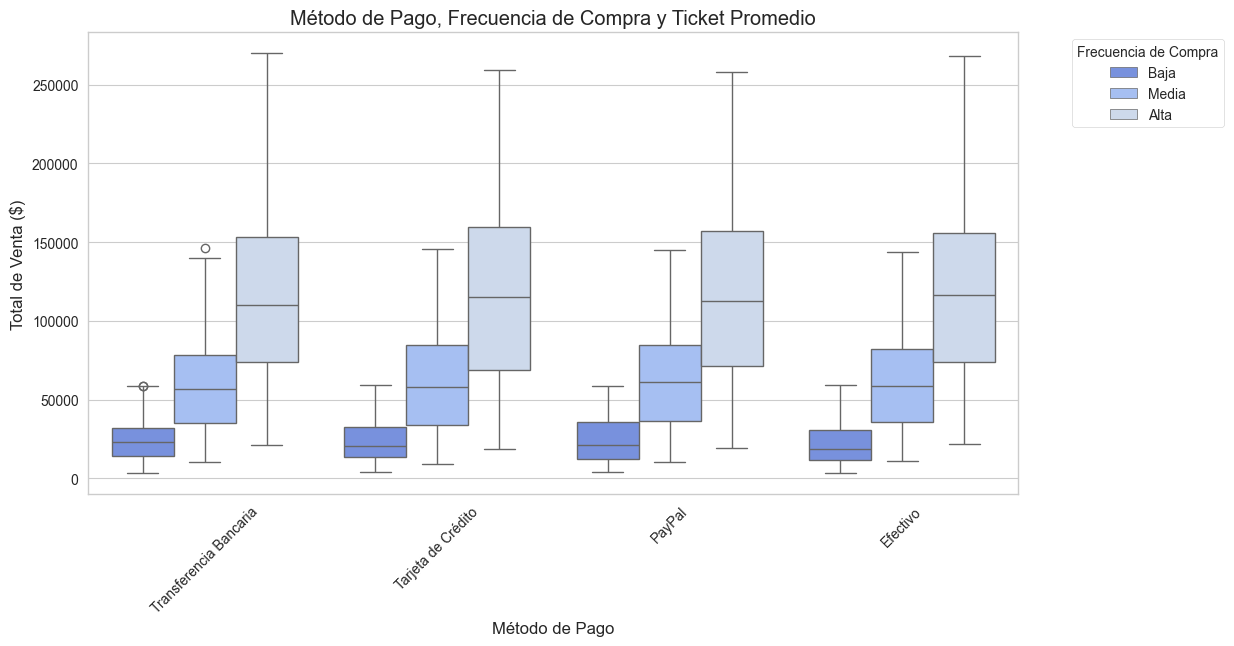

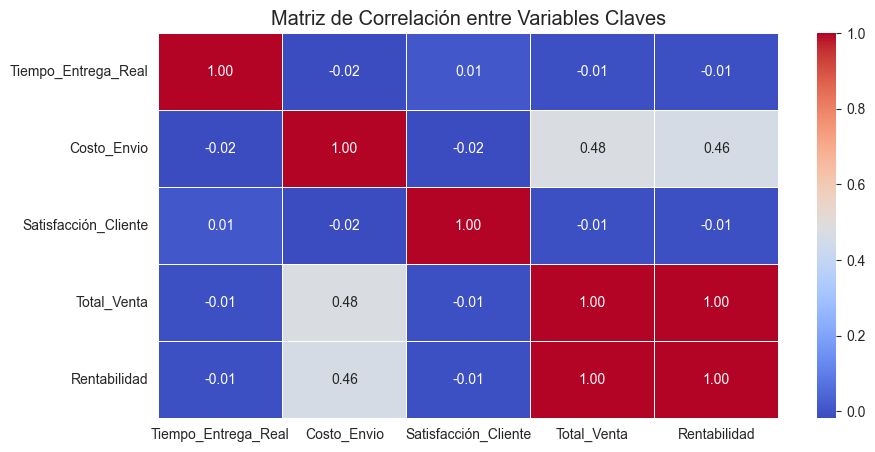

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
url = "https://raw.githubusercontent.com/AlejoMaros/DataScience/refs/heads/main/Dataset_Ventas.csv"
df = pd.read_csv(url)

### 1. ABSTRACT ###
"""
Este proyecto analiza un dataset de ventas para comprender patrones de compra, comportamientos de clientes y eficiencia en la entrega.
Se investigan relaciones entre el tipo de producto, métodos de pago, descuentos aplicados y satisfacción del cliente.
Se emplean técnicas de análisis exploratorio de datos (EDA) y visualización para detectar tendencias, correlaciones y anomalías en los datos.
Además, se evaluará el impacto de los costos de envío y la recurrencia de clientes sobre la rentabilidad y volumen de ventas.
"""

### 2. PREGUNTAS E HIPÓTESIS ###
# Preguntas
# - ¿Cómo afectan los descuentos a la cantidad de productos vendidos y a la rentabilidad de la empresa?
# - ¿Existe una correlación entre el tiempo de entrega, costos de envío y satisfacción del cliente?
# - ¿Qué métodos de pago son más utilizados y cómo afectan la frecuencia de compra?
# - ¿Hay diferencias significativas entre las categorías de productos en cuanto a precio, volumen de ventas y rentabilidad?
# - ¿La recurrencia del cliente afecta el ticket promedio de compra?

# Hipótesis
# - Un mayor descuento incrementa la cantidad vendida, pero reduce la rentabilidad.
# - Retrasos en la entrega y altos costos de envío disminuyen la satisfacción del cliente.
# - Los clientes que pagan con tarjeta de crédito tienen un ticket promedio mayor.
# - Los clientes recurrentes tienden a realizar compras de mayor valor en comparación con clientes nuevos.

### 3. IDENTIFICACIÓN DE VALORES PERDIDOS ###
print("Valores nulos por columna:")
print(df.isnull().sum())

### 4. VISUALIZACIONES ###

sns.set_style("whitegrid")
color_palette = sns.color_palette("coolwarm")

# Relación entre descuento, rentabilidad y cantidad vendida
plt.figure(figsize=(10,5))
sns.scatterplot(x='Descuento_Aplicado', y='Rentabilidad', size='Cantidad_Vendida', hue='Cantidad_Vendida', alpha=0.7, data=df, palette=color_palette, edgecolor='black')
plt.title('Impacto del Descuento en la Rentabilidad y Cantidad Vendida')
plt.xlabel('Descuento Aplicado (%)')
plt.ylabel('Rentabilidad ($)')
plt.legend(title='Cantidad Vendida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribución del Tiempo de Entrega según la Satisfacción del Cliente
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Tiempo_Entrega_Real', hue='Satisfacción_Cliente', bins=15, kde=True, palette=color_palette, alpha=0.6)
plt.title('Distribución del Tiempo de Entrega según la Satisfacción del Cliente')
plt.xlabel('Tiempo de Entrega Real (días)')
plt.ylabel('Frecuencia')
plt.legend(title='Satisfacción del Cliente')
plt.show()

# Método de pago, frecuencia de compra y ticket promedio
plt.figure(figsize=(12,6))
sns.boxplot(x='Método_Pago', y='Total_Venta', hue='Frecuencia_Compra', data=df, palette=color_palette)
plt.title('Método de Pago, Frecuencia de Compra y Ticket Promedio')
plt.xlabel('Método de Pago')
plt.ylabel('Total de Venta ($)')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia de Compra', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(10,5))
corr = df[['Tiempo_Entrega_Real', 'Costo_Envio', 'Satisfacción_Cliente', 'Total_Venta', 'Rentabilidad']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Claves')
plt.show()

### 5. CONCLUSIONES ###
# - Se observó que los descuentos aumentan la cantidad vendida, pero pueden reducir la rentabilidad si no se manejan adecuadamente.
# - Los retrasos en la entrega afectan negativamente la satisfacción del cliente, especialmente en productos de alta demanda.
# - Los clientes que pagan con tarjeta de crédito suelen gastar más por transacción en comparación con otros métodos de pago.
# - Los clientes recurrentes tienen un ticket promedio más alto que los clientes nuevos, lo que sugiere que fidelizar clientes puede ser más rentable a largo plazo.
# - Los costos de envío elevados pueden afectar la satisfacción del cliente y reducir la rentabilidad si no se gestionan adecuadamente.
# - A través del análisis multivariado, se confirmó que la cantidad vendida varía con el descuento y que el costo de envío influye en la satisfacción del cliente.

